# ANN Miranda vs Garcia Attributes

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, sys, cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split, KFold

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
#Old dataset
#train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/train_70000.csv"
#test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/test_70000.csv"

#New dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_train_70000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_test_70000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [4]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]

In [5]:
folder="../../../Dataset/Mono/MonoSamples/WOW_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images[:6000]
print(len(images))

6000


In [39]:
#%% Importing the dataset
labels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity','IsStego','Location']
trainDataset = pd.read_csv(train_dataset_url,header=None,names=labels)
MirandaX_Train = trainDataset.iloc[:, :-2].values
MirandaY_Train = trainDataset.iloc[:, -2].values

testDataset = pd.read_csv(test_dataset_url,header=None,names=labels)
MirandaX_Test = testDataset.iloc[:, :-2].values
MirandaY_Test = testDataset.iloc[:, -2].values

In [32]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i])) 
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

C:\Users\Administrador\anaconda3\envs\proyecto\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


8.296247243881226


In [34]:
GarciaX.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kurtosis        6000 non-null   float64
 1   Skewness        6000 non-null   float64
 2   Std             6000 non-null   float64
 3   Range           6000 non-null   float64
 4   Median          6000 non-null   float64
 5   Geometric_Mean  6000 non-null   float64
 6   Mobility        6000 non-null   float64
 7   Complexity      6000 non-null   float64
dtypes: float64(8)
memory usage: 375.1 KB


In [11]:
sc=StandardScaler()

In [12]:
pd.DataFrame(sc.fit_transform(trainDataset.iloc[:, :-2])).describe() #Dataset Miranda

,0,1,2,3,4,5,6,7
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,-4.229256e-17,-5.799874e-17,1.835754e-16,3.322342e-17,9.409140e-17,6.661338e-19,1.034728e-16,-2.158274e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-5.230433e-01,-1.326607e+00,-1.082958e+00,-6.275773e-01,-2.044531e+00,-2.074518e+00,-1.270998e+00,-1.084507e+00
25%,-4.609177e-01,-6.081873e-01,-5.691417e-01,-4.619362e-01,-7.492067e-01,-7.890094e-01,-8.875347e-01,-7.227772e-01
50%,-3.714119e-01,-3.169261e-01,-2.858470e-01,-3.056304e-01,1.097251e-01,5.970005e-02,-2.509995e-01,-3.190684e-01
75%,-9.420250e-02,1.835976e-01,1.973144e-01,-1.180893e-02,7.677776e-01,8.077413e-01,8.752547e-01,4.329381e-01
max,5.101185e+00,4.184234e+00,8.957463e+00,1.055152e+01,2.686520e+00,2.100641e+00,3.224357e+00,4.515896e+00


In [13]:
pd.DataFrame(sc.fit_transform(x)).describe()                        #Dataset García

,0,1,2,3,4,5,6,7
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,2.456368e-17,3.264056e-17,-4.063879e-17,3.692417e-17,-1.800412e-17,4.976020e-16,-9.606205e-17,2.935152e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-4.656624e-01,-1.288740e+00,-9.711704e-01,-5.029447e-01,-1.544037e+00,-4.461845e-01,-1.086673e+00,-1.644707e+00
25%,-4.262899e-01,-5.883651e-01,-5.119245e-01,-3.924966e-01,-8.699636e-01,-4.461845e-01,-6.423876e-01,-7.856079e-01
50%,-3.558621e-01,-3.174839e-01,-2.807512e-01,-2.961054e-01,-3.298144e-03,-4.461845e-01,-3.263044e-01,-1.045969e-01
75%,-1.467540e-01,1.483447e-01,1.377147e-01,-6.182141e-02,7.911452e-01,-4.461845e-01,2.306981e-01,6.843679e-01
max,4.827028e+00,4.064539e+00,9.574273e+00,1.040398e+01,2.404106e+00,3.274536e+00,5.156867e+00,3.150578e+00


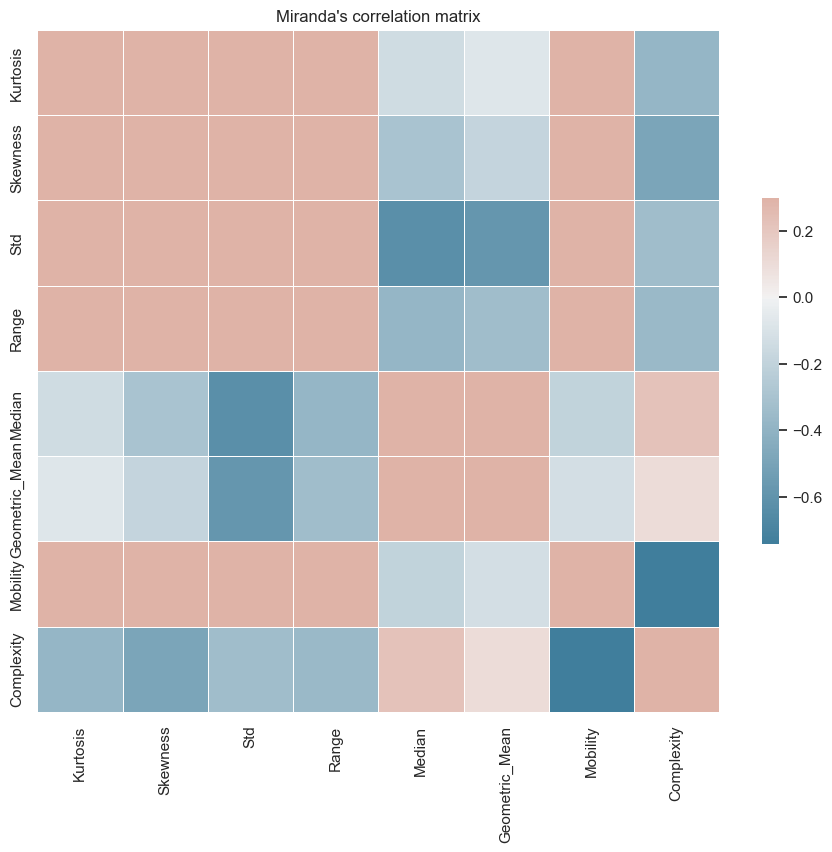

In [16]:
sns.set_theme(style="dark")
corr = trainDataset.iloc[:, :-2].corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

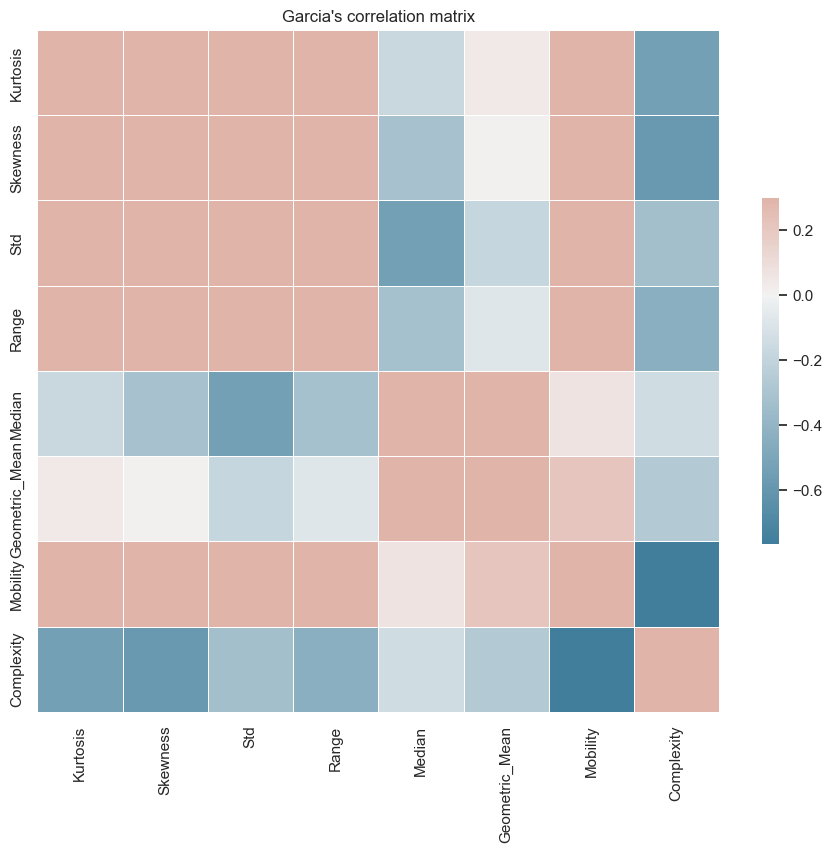

In [17]:
sns.set_theme(style="dark")
corr = x.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcia's correlation matrix")
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=False)
acc_per_fold = []
loss_per_fold = []

#%% Feature Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc.fit_transform(


In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [41]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [30]:
x

array([[-0.41104669, -0.62177189, -0.73992617, ...,  2.68035362,
         0.60424527, -0.96068317],
       [-0.44623299, -0.6290468 , -0.35884208, ..., -0.44618454,
        -0.77882488,  1.59836403],
       [-0.22130159, -0.00653692,  0.04428696, ..., -0.44618454,
         0.96582053, -0.93437405],
       ...,
       [-0.34947194, -0.29154515, -0.27162967, ..., -0.44618454,
        -0.47744141,  0.1112738 ],
       [-0.19242963,  0.14051333,  0.02209791, ..., -0.44618454,
        -0.68650596,  0.14299527],
       [-0.41624767, -0.47136997, -0.16212793, ..., -0.44618454,
        -0.32318628,  0.20527883]])

In [42]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
  tf.keras.layers.Dense(4, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_Train, np.array(Y_Train,dtype=float), batch_size = 64, epochs = 250)

Epoch 1/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5145
Epoch 2/250
63/63 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.7180
Epoch 3/250
63/63 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7832
Epoch 4/250
63/63 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.8155
Epoch 5/250
63/63 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8353
Epoch 6/250
63/63 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8482
Epoch 7/250
63/63 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8535
Epoch 8/250
63/63 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8568
Epoch 9/250
63/63 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8590
Epoch 10/250
63/63 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8640
Epoch 11/

In [ ]:

fold_no=0
for train, test in kf.split(x, y):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
      tf.keras.layers.Dense(4, activation=tf.nn.relu),
      tf.keras.layers.Dense(2, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])
    #%% Feature Scaling
    sc = StandardScaler()

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m,precision_m, recall_m])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    #Fitting
    
    #history=model.fit(sc.fit_transform(x[train]), y[train],validation_data=(sc.fit_transform(x[test]), y[test]), epochs=250,batch_size=64)
    history=model.fit(x[train], y[train],validation_data=(x[test], y[test]), epochs=250,batch_size=64)
    print("\n\n\n\n\nFitted")
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc,f1_score, precision, recall = model.evaluate(x[test], y[test], verbose=2)
    print("Loss:",test_loss, "\nAccuracy:",test_acc,"\nF1 score:",f1_score, "\nPrecision:",precision, "\nRecall",recall)
        
    plt.plot(history.history['precision_m'], label='precision')
    plt.plot(history.history['recall_m'], label = 'recall')
    plt.plot(history.history['f1_m'], label = 'F1')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend(loc='lower right')
    plt.show()
    print("Next fold")
    #dataMqtt={"Fold":str(fold_no),"timestamp":str(datetime.now()),"Loss":str(test_loss), "Acc":str(test_acc),"F1":str(f1_score),"Precision":str( precision),"Recall": str(recal)}
    #dataMqtt_out=json.dumps(data)
    #retMqtt= client1.publish("stegian/data",dataMqtt_out)
    
    # Generate generalization metrics
    scores = model.evaluate(x[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no += 1

In [ ]:
print(model)
model.evaluate(X_Train, Y_Train)
print(model.metrics_names)
#%% Predicting the Test set results

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = (model.predict(X_Test) > 0.5)
#%% Making the Confusion Matrix
cm = metrics.confusion_matrix(Y_Test, y_pred)
print("Confusion matrix\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity :', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity :', specificity)
#%% 
print("Precision",metrics.precision_score(Y_Test, y_pred, average=None))
print("Accuracy",metrics.accuracy_score(Y_Test, y_pred))
print("F1",metrics.f1_score(Y_Test, y_pred, average=None))

In [ ]:
import numpy as np


In [ ]:
fallas=np.array(labels,dtype='<U256')
y_pred=y_pred.reshape(len(y_pred))
print(np.shape(y_pred))
print(np.shape(Y_Test))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Test[i]>0.5):
        fallas=np.vstack((fallas,testDataset.iloc[i].to_numpy()))

y_pred = (model.predict(X_Train) > 0.5).reshape(len(X_Train))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Train[i]>0.5):
        fallas=np.vstack((fallas,trainDataset.iloc[i].to_numpy()))

asd="fallasEval.csv"
print("Fallas",len(fallas))
np.savetxt(asd,fallas,delimiter=",", fmt="%s")

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
